In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Training/0/Training_3908.jpg")

In [3]:
img_array.shape #rgb

(48, 48, 3)

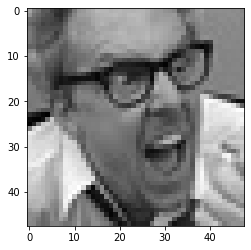

In [4]:
plt.imshow(img_array) ##BGR

In [5]:
Datadirectory = "Training/" ##taining dataset

In [6]:
Classes = ["0","1","2","3","4","5","6"] ##list of classes

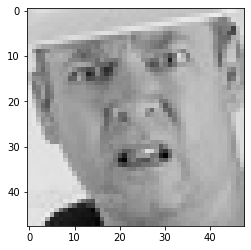

In [7]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb 
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

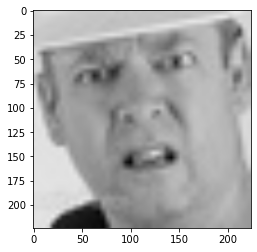

In [8]:
img_size = 224 ##imagenet => 224*224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()


In [9]:
new_array.shape

(224, 224, 3)

read all the imagese and convert into array

In [10]:
training_Data = [] ##data array

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                    pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

1182


In [13]:
import random

random.shuffle(training_Data)

In [14]:
X = [] ##data/features
y = [] ##labels

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) ##converting into 4 dimensions for mobileNet

In [15]:
X.shape

(1182, 224, 224, 3)

In [16]:
#normalize the data
X = X/255.0;

In [17]:
type(y)

list

In [18]:
y[0]

0

In [19]:
Y = np.array(y)

In [20]:
Y.shape

(1182,)

deep learning model for training- Transfer Learning

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = tf.keras.applications.MobileNetV2() #pre-trained model

In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

transfer learning-Tuning, weight will start from last check point

In [24]:
base_input = model.layers[0].input ##i/p

In [25]:
base_output = model.layers[-2].output

In [26]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [27]:
final_output = layers.Dense(128)(base_output) ##adding new layer, after o/p of global pooling layer
final_output = layers.Activation('relu')(final_output) ##activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation = 'softmax')(final_output) ##my clses are 07

In [28]:
final_output ##o/p

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [29]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [30]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [31]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

#NEW MODEL TRAINING

In [32]:
new_model.fit(X,Y, epochs = 15)

Epoch 1/15
267/267 [==============================] - 1638s 6s/step - loss: 0.7553 - accuracy: 0.6487
Epoch 2/15
267/267 [==============================] - 2187s 8s/step - loss: 0.6487 - accuracy: 0.7045
Epoch 3/15
267/267 [==============================] - 1589s 6s/step - loss: 0.5781 - accuracy: 0.7460
Epoch 4/15
267/267 [==============================] - 1625s 6s/step - loss: 0.5322 - accuracy: 0.7675
Epoch 5/15
267/267 [==============================] - 1580s 6s/step - loss: 0.4860 - accuracy: 0.7901
Epoch 6/15
267/267 [==============================] - 1590s 6s/step - loss: 0.4343 - accuracy: 0.8182
Epoch 7/15
267/267 [==============================] - 1602s 6s/step - loss: 0.3969 - accuracy: 0.8321
Epoch 8/15
267/267 [==============================] - 1601s 6s/step - loss: 0.3533 - accuracy: 0.8552
Epoch 9/15
267/267 [==============================] - 1582s 6s/step - loss: 0.3118 - accuracy: 0.8758
Epoch 10/15
267/267 [==============================] - 1592s 6s/step - loss: 0.271

In [32]:
new_model.save('Final_model_94p39.h5') #save new model

In [33]:
new_model = tf.keras.models.load_model('Final_model_94p39.h5') #loading the model

In [34]:
frame = cv2.imread("happy_boy.jpg")

In [35]:
frame.shape

(193, 262, 3)

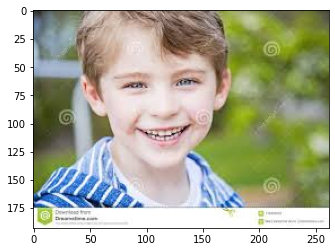

In [36]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#we need face detection alg(gray img)

In [37]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [38]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #converting into gray image

In [39]:
gray.shape

(193, 262)

In [40]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w, y+h),(255,0,0), 2) #BGR
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        printf("Face Not Detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey + eh, ex:ex + ew]

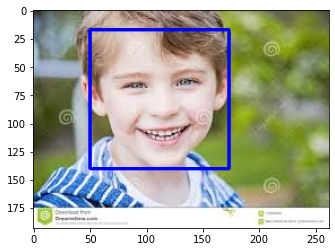

In [41]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

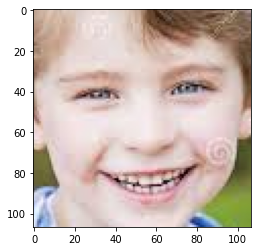

In [42]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [43]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0 #normalizing image

In [44]:
Predictions = new_model.predict(final_image)

In [45]:
Predictions[0]

array([0.25609344, 0.15081842, 0.26040912, 0.09686863, 0.16378774,
       0.0445097 , 0.02751296], dtype=float32)

In [46]:
np.argmax(Predictions)

2

Realtime Video Demo

In [ ]:
import cv2 ##pip install opencv-python
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font= cv2.FONT_HERSHEY_PLAIN

#setting rectangle background to white
rectangle_bgr = (255,255,255)

#make a black image
img = np.zeros((500,500))
#set some text
text = "some text in a box!"

#get the weight and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness =1)[0]

#set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

#make the coords of the box witha a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText (img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color=(0, 0, 0), thickness=1)

#cap = cv2.VideoCapture(1)
#check webcam
#if not cap.isOpened():
#    cap = cv2.VideoCapture(0)
#if not cap.isOpened():
 #   raise IOError("Cannot open webcam")
    #camera to opren
video_capture = cv2.VideoCapture(0)

cv2.namedWindow("Window")

while True:
    ret, frame = video_capture.read()
    cv2.imshow("Window", frame)
    
    #while True:
        #ret,frame = cap.read()
        
#eye_ cascade = cv2. CascadeClassifier(cv2.data.haarcascades + 'haarcascade eye.xml
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor (frame, cv2.COLOR_BGR2GRAY)

#print(faceCascade.empty())
faces = faceCascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]

cv2.rectangle(frame, (x, y),(x+w, y+h),(255,0,0),2)
facess = faceCascade.detectMultiScale(roi_gray)
if len(facess) == 0:
    print( "Face not detected")
else:
    for (ex,ey,ew,eh) in facess:
        face_roi=roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face
        
    final_image =cv2.resize(face_roi,(224,224))
    final_image=np.expand_dims (final_image, axis =0)## need fourth dimension
    final_image = final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX

    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

if (np.argmax(Predictions)==0):
    status = "Angry"
    
    x1,y1,w1,h1 = 0,0,175,75
    ## draw black backgroup rectangle
    cv2.rectangle(frame,(x1, x1),(x1 + w1,y1 + h1), (0,0,0),-1)
    # add text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
    
    cv2.putText(frame,status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
    
    cv2.rectangle(frame, (x,y), (x+w, y+h),(0, 0, 255))
    
elif (np.argmax(Predictions)==1):
    status = "Disgust"
    
    x1,y1,w1,h1 = 0,0,175,75
    #Draw black background rectangle
    cv2.rectangle(frame,(x1, x1),(x1 + w1, y1 + h1), (0,0,0), -1)
    # add text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)

    cv2.putText(frame, status,(100, 150), font, 3, (0,0,255),2,cv2.LINE_4)
    
    cv2.rectangle(frame, (x,y), (x+w, y+h),(0, 0, 255))

elif (np.argmax(Predictions)==2):
    status = "fear"
    

    x1,y1,w1,h1 = 0,0,175,75
    #Draw black background rectangle
    cv2.rectangle(frame,(x1, x1),(x1 + w1, y1 + h1), (0,0,0), -1)
    # add text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)

    cv2.putText(frame, status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
    
    cv2.rectangle(frame, (x,y), (x+w, y+h),(0, 0, 255))

elif (np.argmax(Predictions)==3):
    status = "happy"
    

    x1,y1,w1,h1 = 0,0,175,75
    #Draw black background rectangle
    cv2.rectangle(frame,(x1, x1),(x1 + w1, y1 + h1), (0,0,0), -1)
    # add text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)

    cv2.putText(frame, status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
    cv2.rectangle(frame, (x,y), (x+w, y+h),(0, 0, 255))

elif (np.argmax(Predictions)==4):
    status = "sad"
    
    
    
    x1,y1,w1,h1 = 0,0,175,75
    #Draw black background rectangle
    cv2.rectangle(frame,(x1, x1),(x1 + w1, y1 + h1), (0,0,0), -1)
    # add text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)

    cv2.putText(frame, status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
    
    cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))

elif (np.argmax(Predictions)==5):
    status = "surprise"
    
    
    x1,y1,w1,h1 = 0,0,175,75
    #Draw black background rectangle
    cv2.rectangle(frame,(x1, x1),(x1 + w1, y1 + h1), (0,0,0), -1)
    # add text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)

    cv2.putText(frame, status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
    cv2.rectangle(frame, (x, y), (x+w, y+h),(0, 0, 255))

else:
    status = "neutral"
    

    x1,y1,w1,h1 = 0,0,175,75
    #Draw black background rectangle
    cv2.rectangle(frame,(x1, x1),(x1+w1, y1+h1), (0,0,0), -1)
    # add text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,255,0),2)
    cv2.putText(frame, status,(100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
    cv2.rectangle(frame, (x, y), (x+w, y+h),(0, 255,0))

    #Using putText method for inserting video text
    
    cv2.imshow('Face Emotion Recognition', frame)
    #if cv2.waitKey(1) & 0xFF == ord('q'):
        #break
        
cap.release()
cv2.destroyAllWindows()


#open camera
#cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
#if not cap.isOpened():
    #raise IOError("Cannot open webcam")

#while True:
 #   ret, frame = cap.read()
  #  frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    #cv2.imshow('Face Emotion Recognition', frame)
   # cv2.imshow('Input', frame)
    #c = cv2.waitKey(1)
    #if c == 27:
        #break
#cap.release()
#cv2.destroyAllWindows()



#camera to opren
#video_capture = cv2.VideoCapture(0)

#cv2.namedWindow("Window")

#while True:
    #ret, frame = video_capture.read()
    #cv2.imshow("Window", frame)
